In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

 12215838_eTranscript.pdf
'802.11ad stuff'
'802.11s stuff'
 80-W3045-1_RevB.pdf
'Colab Notebooks'
'Data Science - Project Report.docx'
'EE 550.zip'
'Georgia Tech CS Prelim'
'Georgia Tech data'
'Georgia Tech ECE Prelim Exams'
'ipad books'
'Iphone pictures'
'Lab 4.zip'
'Mariam Mehndi'
'mmwave stuff'
'My Drive'
 ns-allinone-3.26.tar.gz
'pics LA'
 pics.zip
'Presentation Skills Chapter 15 II.gslides'
'Presentation Skills Chapter 15 II.pptx'
'Proposal Writing.gslides'
'Proposal Writing.pptx'
 research
 results.pdf
'Sample Data.xlsx'
 Test
'Texas A&M data'
'University of London Assessment Coversheet_32a2ab6906bbd5c96e3c09e4ea437687.docx'
'University of London Assessment Coversheet_42eda2427267f958c6b0613b3cd16748.docx'
'University of London Assessment Coversheet_990cb9ec98d10528383e766956453437.docx'
'University of London Assessment Coversheet_bc5a5da3533e55f0fbd46623bc06d62c.docx'
'Untitled document.gdoc'
 Untitled.jpg
'Untitled spreadsheet.gsheet'
 video-output-AFA94F60-28B5-4E66-9A42-4440B

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15283, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 15283 (delta 40), reused 50 (delta 26), pack-reused 15186
Receiving objects: 100% (15283/15283), 13.78 MiB | 20.48 MiB/s, done.
Resolving deltas: 100% (10351/10351), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!ls

3rdparty		darknet_video.py       net_cam_v4.sh
build			data		       README.md
build.ps1		image_yolov3.sh        results
cfg			image_yolov4.sh        scripts
cmake			include		       src
CMakeLists.txt		json_mjpeg_streams.sh  vcpkg.json
DarknetConfig.cmake.in	LICENSE		       video_yolov3.sh
darknet_images.py	Makefile	       video_yolov4.sh
darknet.py		net_cam_v3.sh


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-07-19 14:28:14--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   102MB/s    in 2.3s    

2021-07-19 14:28:16 (102 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!ls

3rdparty	DarknetConfig.cmake.in	json_mjpeg_streams.sh  scripts
backup		darknet_images.py	LICENSE		       src
build		darknet.py		Makefile	       vcpkg.json
build.ps1	darknet_video.py	net_cam_v3.sh	       video_yolov3.sh
cfg		data			net_cam_v4.sh	       video_yolov4.sh
cmake		image_yolov3.sh		obj		       yolov3.weights
CMakeLists.txt	image_yolov4.sh		README.md
darknet		include			results


In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
!ls /mydrive/yolov3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom.cfg


In [ ]:
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/__MACOSX/._obj     
  inflating: data/obj/rotated_270_usa_4.jpg  
  inflating: data/obj/classes.txt    
  inflating: data/__MACOSX/obj/._classes.txt  
  inflating: data/obj/rotated_270_usa_17.txt  
  inflating: data/obj/usa_21.txt     
  inflating: data/obj/rotated_180_usa_20.jpg  
  inflating: data/obj/noisy_usa_19.jpg  
  inflating: data/obj/rotated_90_usa_4.jpg  
  inflating: data/obj/usa_4.txt      
  inflating: data/obj/rotated_180_usa_21.jpg  
  inflating: data/obj/usa_20.txt     
  inflating: data/obj/rotated_180_usa_19.jpg  
  inflating: data/obj/noisy_usa_20.jpg  
  inflating: data/__MACOSX/obj/._noisy_usa_20.jpg  
  inflating: data/obj/rotated_180_usa_4.jpg  
  inflating: data/obj/.DS_Store      
  inflating: data/__MACOSX/obj/._.DS_Store  
  inflating: data/obj/noisy_usa_21.jpg  
  inflating: data/obj/usa_19.txt     
  inflating: data/obj/rotated_90_usa_17.txt  
  inflating: data/obj/rotated_270_usa_4.txt  
  infl

In [ ]:
!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

In [ ]:
!cp /mydrive/yolov3/obj.names ./data
!cp /mydrive/yolov3/obj.data  ./data

In [ ]:
!cp /mydrive/yolov3/generate_train.py ./

In [ ]:
!python generate_train.py

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2021-07-19 14:29:07--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   100MB/s    in 1.5s    

2021-07-19 14:29:08 (100 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.562641), count: 3, class_loss = 0.509733, iou_loss = 0.117497, total_loss = 0.627229 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.621359), count: 12, class_loss = 0.766986, iou_loss = 1.469251, total_loss = 2.236237 
 total_bbox = 217750, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.564818), count: 3, class_loss = 0.071787, iou_loss = 0.194762, total_loss = 0.266549 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.706101), count: 13, class_loss = 0.233737, iou_loss = 0.636708, total_loss = 0.870446 
 total_bbox = 217766, rewritten_bbox = 0.000000 % 
v3 

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
imshow('chart.png')

NameError: ignored

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/Test/USA/rotated_90_usa_1.jpg -thresh 0.6

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  

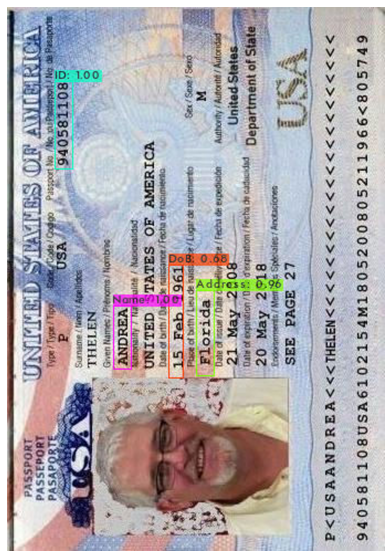

In [ ]:
imShow('predictions.jpg')